In [90]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

#### Exercise 1

Given
$$\hat{F}_n(x) = \frac{\sum_{i=1}^n I(X_i \leq x)}{n},$$
we have
$$E[\hat{F}_n(x)] = \frac{\sum_{i=1}^n E[I(X_i \leq x)]}{n} = \frac{\sum_{i=1}^n P(X_i \leq x)}{n} = P(X_i \leq x) = F(x),$$
where we used the fact that $E[I(X_i \leq x)] = P(X_i \leq x)$, as proved on p. 49.

Therefore, 
$$\text{bias} = E[\hat{F}_n(x)] - F(x) = 0$$
for all $x$.

Now,
$$\begin{split}
E\left[\hat{F}_n^2(x)\right]
&= E\left[\left(\frac{\sum_{i=1}^n I(X_i \leq x)}{n}\right)^2\right] 
= \frac{1}{n^2}E\left[\sum_{i=1}^n \sum_{j=1}^n I(X_i \leq x) I(X_j \leq x)\right]
= \frac{1}{n^2}E\left[\sum_{i=1}^n I^2(X_i \leq x) + \sum_{i=1}^n \sum_{j \neq i} I(X_i \leq x) I(X_j \leq x)\right] \\
&= \frac{1}{n^2}E\left[\sum_{i=1}^n I(X_i \leq x) + \sum_{i=1}^n \sum_{j \neq i} I(X_i \leq x) I(X_j \leq x)\right]
= \frac{1}{n^2}\left(\sum_{i=1}^n E[I(X_i \leq x)] + \sum_{i=1}^n \sum_{j \neq i} E[I(X_i \leq x)] E[I(X_j \leq x)]\right) \\
&= \frac{1}{n^2}\left(n F(x) + n(n-1) F^2(x)\right)
= \frac{F(x) + (n-1) F^2(x)}{n},
\end{split}$$
and therefore
$$V\left[\hat{F}_n^2(x)\right] = E\left[\hat{F}_n^2(x)\right] - E[\hat{F}_n(x)]^2 = \frac{F(x) + (n-1) F^2(x)}{n} - F^2(x) = \frac{F(x)(1 - F(x))}{n}.$$

By Theorem 6.9, $\text{MSE} = \text{bias}^2 + V\left[\hat{F}_n^2(x)\right] = \frac{F(x)(1 - F(x))}{n} \xrightarrow[n \to \infty]{} 0$.

Then by Theorem 6.10, $\hat{F}_n(x) \xrightarrow[]{P} F(x)$.

#### Exercise 2

Using the results of Examples 7.10 and 7.11,
$$\hat{p} = \frac{1}{n} \sum_{i=1}^n X_i,$$
$$\hat{q} = \frac{1}{m} \sum_{i=1}^m Y_i,$$
$$\hat{\sigma}_{p} = \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{p})^2,$$
$$\hat{\sigma}_{q} = \frac{1}{m-1} \sum_{i=1}^m (Y_i - \hat{q})^2,$$
and
$$\hat{\text{se}}_{\hat{p}} = \frac{\hat{\sigma}_p}{\sqrt{n}}.$$

The approximate 90% confidence interval for $p$ is 
$$\hat{p} \pm z_{\alpha/2} \cdot \hat{\text{se}}_{\hat{p}}.$$

Using the results of Example 7.15,
$$\hat{p} - \hat{q} = \frac{1}{n} \sum_{i=1}^n X_i - \frac{1}{m} \sum_{i=1}^m Y_i$$
and
$$\hat{\text{se}}^2_{\hat{p} - \hat{q}} = V[\hat{p} - \hat{q}] = V[\hat{p}] + V[\hat{q}] = \hat{\text{se}}_{\hat{p}}^2 + \hat{\text{se}}_{\hat{q}}^2.$$

The approximate 90% confidence interval for $p - q$ is 
$$\hat{p} - \hat{q} \pm z_{\alpha/2} \cdot \hat{\text{se}}_{\hat{p} - \hat{q}}.$$


#### Exercise 3

In [3]:
n = 100
m = 1000
x = stats.norm.rvs(size=(m, n))

In [4]:
alpha = 0.05
eps = np.sqrt(np.log(2 / alpha) / 2 / n)

In [15]:
# define the grid on which we evaluate F(x) and Fn(x)
grid = np.logspace(-4, 1)
grid = np.concatenate([-np.flip(grid), [0], grid])

In [28]:
# evaluate Fn(x) on the grid
Fn = np.apply_along_axis(lambda sample: stats.ecdf(sample).cdf.evaluate(grid), 1, x)

In [29]:
# find the bounds of the confidence intervals
L = np.maximum(Fn - eps, 0)
U = np.minimum(Fn + eps, 1)

In [54]:
# evaluate F(x) on the grid
F = stats.norm.cdf(grid)

In [61]:
# whether the CI for the empirical CDF contains the true CDF
contains = np.all((L <= F) & (F <= U), axis=1)

In [69]:
# coverage
np.mean(contains)

0.969

In [67]:
# cases where the true CDF is outside of the confidence interval
np.where(~contains)

(array([  7,  79,  82, 101, 103, 113, 118, 158, 162, 173, 217, 232, 256,
        257, 289, 323, 333, 349, 403, 421, 497, 523, 533, 537, 571, 587,
        834, 859, 898, 948, 984]),)

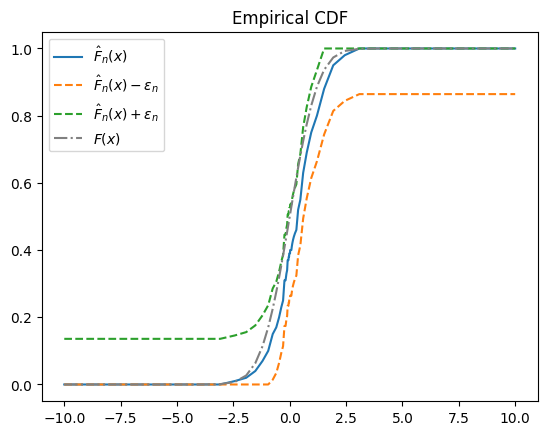

In [68]:
idx = 79
fig, ax = plt.subplots()
ax.plot(grid, Fn[idx], label='$\\hat{{F}}_n(x)$');
ax.plot(grid, L[idx], '--', label='$\\hat{{F}}_n(x) - \\epsilon_n$');
ax.plot(grid, U[idx], '--', label='$\hat{{F}}_n(x) + \\epsilon_n$');
ax.plot(grid, F, '-.', color='gray', label='$F(x)$');
ax.set_title('Empirical CDF');
ax.legend();

#### Exercise 4

By Theorem 7.3, $E\left[\hat{F}_n(x)\right] = F(x)$ and $V\left[\hat{F}_n(x)\right] = F(x) (1-F(x))$.

Then by Theorem 5.8, $\hat{F}_n(x) \approx N\left(F(x), \frac{F(x)(1-F(x))}{n}\right)$.

#### Exercise 5

Note that $I(A) I(B) = I(A,B)$, where $A$ and $B$ are events, and that $E[I(X \in A)] = P(X \in A)$. Then
$$\begin{split}
E\left[\hat{F}_n(x) \hat{F}_n(y)\right]
&= E\left[\frac{1}{n} \sum_{i=1}^n I(X_i \leq x) \cdot \frac{1}{n} \sum_{j=1}^n I(X_j \leq y)\right]
= \frac{1}{n^2} E\left[\sum_{i=1}^n \sum_{j=1}^n I(X_i \leq x) I(X_j \leq y) \right]
= \frac{1}{n^2} E\left[\sum_{i=1}^n \sum_{j=1}^n I(X_i \leq x, X_j \leq y) \right] \\
&= \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n P(X_i \leq x, X_j \leq y)
= \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n P(X_i \leq x) P(X_j \leq y)
= \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n F(x) F(y)
= F(x) F(y).
\end{split}$$
where we used the assumption that $X_i$ and $Y_j$ are independent, and hence $P(X_i \leq x, X_j \leq y) = P(X_i \leq x) P(X_j \leq y)$.

And finally,
$$\text{Cov}\left[\hat{F}_n(x) \hat{F}_n(y)\right] 
= E\left[\hat{F}_n(x) \hat{F}_n(y)\right] - E\left[\hat{F}_n(x)\right] E\left[\hat{F}_n(y)\right]
= F(x) F(y) - F(x) F(y) = 0.$$

We can see that $\hat{F}_n(x)$ and $\hat{F}_n(y)$ are uncorrelated if $x \neq y$.

#### Exercise 6

By the results of Exercise 5, $\hat{F}_n(a)$ and $\hat{F}_n(b)$ are uncorrelated, and therefore
$$\hat{\text{se}}_{\hat{\theta}}^2
= V[\hat{\theta}] 
= V\left[\hat{F}_n(a)\right] + V\left[\hat{F}_n(b)\right]
= \frac{F(a)(1 - F(a))}{n} + \frac{F(b)(1 - F(b))}{n}.$$

The $1 - \alpha$ confidence interval is then
$$\hat{\theta} \pm z_{\alpha / 2} \cdot \hat{\text{se}}_{\hat{\theta}}.$$

#### Exercise 7

In [104]:
data = pd.read_fwf('fijiquakes.dat').set_index('Obs.')
data

,lat,long,depth,mag,stations
Obs.,,,,,
1,-20.42,181.62,562,4.8,41
2,-20.62,181.03,650,4.2,15
3,-26.00,184.10,42,5.4,43
4,-17.97,181.66,626,4.1,19
5,-20.42,181.96,649,4.0,11
...,...,...,...,...,...
996,-25.93,179.54,470,4.4,22
997,-12.28,167.06,248,4.7,35
998,-20.13,184.20,244,4.5,34


In [127]:
n = data.shape[0]

In [108]:
alpha = 0.05
eps = np.sqrt(np.log(2 / alpha) / 2 / n)

In [119]:
# define the grid on which we evaluate Fn(x)
grid = np.linspace(data['mag'].min() - 0.5, data['mag'].max() + 0.5)

In [124]:
Fn = stats.ecdf(data['mag']).cdf.evaluate
Fn_est = Fn(grid)
L = np.maximum(Fn_est - eps, 0)
U = np.minimum(Fn_est + eps, 1)

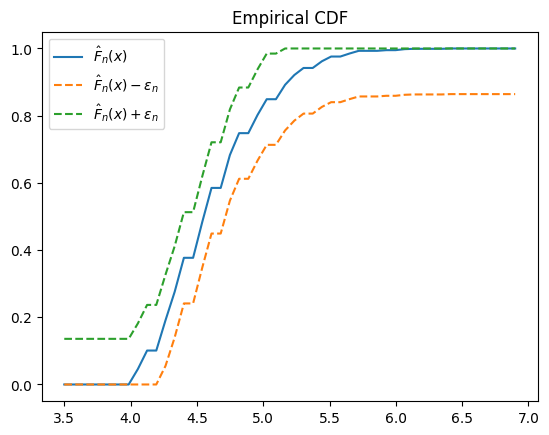

In [125]:
fig, ax = plt.subplots()
ax.plot(grid, Fn_est, label='$\\hat{{F}}_n(x)$');
ax.plot(grid, L, '--', label='$\\hat{{F}}_n(x) - \\epsilon_n$');
ax.plot(grid, U, '--', label='$\hat{{F}}_n(x) + \\epsilon_n$');
ax.set_title('Empirical CDF');
ax.legend();

Using the results of Exercise 6:

In [136]:
def se_sq(Fn, n, x):
    return Fn(x) * (1 - Fn(x)) / n

In [137]:
a = 4.9
b = 4.3
theta = Fn(a) - Fn(b)
se_theta = np.sqrt(se_sq(Fn, n, a) + se_sq(Fn, n, b))

In [138]:
theta

0.526

In [139]:
se_theta

0.018937264850025202

In [140]:
def ci(alpha, theta, se):
    return theta + stats.norm.ppf([alpha / 2, 1 - alpha / 2]) * se

The 95% confidence interval for $F(4.9) - F(4.3)$ is

In [141]:
ci(0.05, theta, se_theta)

array([0.48888364, 0.56311636])

#### Exercise 8

In [143]:
data = pd.read_fwf('ex8.txt', index_col=0)
data

,eruptions,waiting
1,3.600,79
2,1.800,54
3,3.333,74
4,2.283,62
5,4.533,85
...,...,...
26,4.117,81
26,2.150,46
27,4.417,90
27,1.817,46


The mean waiting time:

In [146]:
theta = data['waiting'].mean()
theta

70.8970588235294

The standard error of the estimate:

In [147]:
se_theta = data['waiting'].std(ddof=1) / np.sqrt(data.shape[0])
se_theta

0.824316366377517

The 90% confidence interval for the waiting time:

In [149]:
ci(0.1, theta, se_theta)

array([69.54117906, 72.25293859])

The median waiting time:

In [150]:
data['waiting'].median()

76.0

#### Exercise 9

Suppose $X_1, \dots, X_n \sim \text{Bernoulli}(p_1)$ signify whether individuals in the first group recovered, and $Y_1, \dots, Y_m \sim \text{Bernoulli}(p_2)$ signify whether individuals in the second group recovered.

Then by the results of Exercise 2,
$$\hat{p}_1 = \frac{1}{n} \sum_{i=1}^n X_i,$$
$$\hat{p}_2 = \frac{1}{m} \sum_{i=1}^m Y_i,$$
$$\hat{\theta} = \hat{p}_1 - \hat{p}_2,$$
$$\hat{\sigma}_{p_1}^2 = \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{p}_1)^2,$$
$$\hat{\sigma}_{p_2}^2 = \frac{1}{m-1} \sum_{i=1}^m (Y_i - \hat{p}_2)^2,$$
$$\hat{\text{se}}_{\hat{\theta}}^2 = \frac{\hat{\sigma}_{p_1}^2}{n} + \frac{\hat{\sigma}_{p_2}^2}{m},$$
and the $1-\alpha$ confidence interval for $\theta$ is
$$\hat{\theta} \pm z_{\alpha / 2} \hat{\text{se}}_{\hat{\theta}}.$$

Given that $X_i \in \{0, 1\}$, we have $X_i^2 = X_i$ and so
$$\hat{\sigma}_{p_1}^2 
= \frac{1}{n-1} \sum_{i=1}^n (X_i - \hat{p}_1)^2 
= \frac{1}{n-1} \sum_{i=1}^n \left(X_i^2 - 2 X_i \hat{p}_1 + \hat{p}_1^2\right)
= \frac{1}{n-1} \left(\sum_{i=1}^n X_i - 2 \hat{p}_1 \sum_{i=1}^n X_i + n \hat{p}_1^2\right)
= \frac{1}{n-1} (n \hat{p}_1 - 2 n \hat{p}_1^2 + n \hat{p}_1)
= \frac{n \hat{p}_1 (1 - \hat{p}_1)}{n-1}
$$
and similarly
$$\hat{\sigma}_{p_2}^2= \frac{m \hat{p}_2 (1 - \hat{p}_2)}{m-1}.$$


In [70]:
n = m = 100
p1 = 0.9
p2 = 0.85
theta = p1 - p2
sigma_p1_sq = n * p1 * (1 - p1) / (n - 1)
sigma_p2_sq = m * p2 * (1 - p2) / (m - 1)
se = np.sqrt(sigma_p1_sq / n + sigma_p2_sq / m)

In [71]:
theta

0.050000000000000044

In [72]:
se

0.04687184332805461

The approximate 80% confidence interval is:

In [84]:
ci(0.2, theta, se)

array([-0.01006868,  0.11006868])

The approximate 95% confidence interval is:

In [85]:
ci(0.05, theta, se)

array([-0.04186712,  0.14186712])

The results of the trial do not allow us to distinguish the efficacies of the two treatments.

#### Exercise 10

In [93]:
data = pd.read_csv('ex10.txt', sep='\t')
data

,Unseeded_Clouds,Seeded_Clouds
0,1202.6,2745.6
1,830.1,1697.8
2,372.4,1656.0
3,345.5,978.0
4,321.2,703.4
5,244.3,489.1
6,163.0,430.0
7,147.8,334.1
8,95.0,302.8
9,87.0,274.7


The estimate of the difference:

In [95]:
theta = data['Seeded_Clouds'].mean() - data['Unseeded_Clouds'].mean()
theta

277.3961538461539

In [97]:
sigma_1 = data['Seeded_Clouds'].std(ddof=1)
sigma_2 = data['Unseeded_Clouds'].std(ddof=1)

The standard error of the estimate:

In [100]:
se = np.sqrt((sigma_1 ** 2 + sigma_2 ** 2) / data.shape[0])
se

138.81991721642947

The approximate 95% confidence interval:

In [101]:
ci(0.05, theta, se)

array([  5.31411577, 549.47819193])

As the 95% confidence interval does not contain 0, we have some evidence that seeding clouds does increase the rainfall.